# Zillow Housing Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading files and getting header

In [2]:
df_city = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/City_time_series.csv")
list(df_city.columns.values)

['Date',
 'RegionName',
 'HomesSoldAsForeclosuresRatio_AllHomes',
 'InventorySeasonallyAdjusted_AllHomes',
 'InventoryRaw_AllHomes',
 'MedianListingPricePerSqft_1Bedroom',
 'MedianListingPricePerSqft_2Bedroom',
 'MedianListingPricePerSqft_3Bedroom',
 'MedianListingPricePerSqft_4Bedroom',
 'MedianListingPricePerSqft_5BedroomOrMore',
 'MedianListingPricePerSqft_AllHomes',
 'MedianListingPricePerSqft_CondoCoop',
 'MedianListingPricePerSqft_DuplexTriplex',
 'MedianListingPricePerSqft_SingleFamilyResidence',
 'MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence',
 'MedianPctOfPriceReduction_AllHomes',
 'MedianPctOfPriceReduction_CondoCoop',
 'MedianPctOfPriceReduction_SingleFamilyResidence',
 'MedianPriceCutDollar_AllHomes',
 'MedianPrice

# Sorting Year in date

In [3]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['Year'] = df_city['Date'].apply(lambda x: x.year)


# Exploring median price per squarefoot of all homes

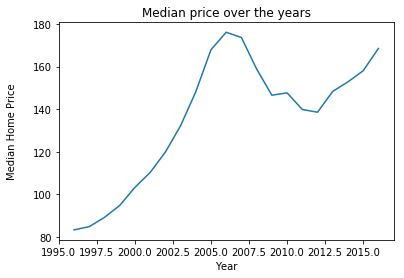

In [4]:
df_city.groupby(df_city['Year'])['MedianSoldPricePerSqft_AllHomes'].mean().plot()

plt.title('Median price over the years')
plt.ylabel('Median Home Price\n')
plt.show()

# Exploring median rental price per squartfoot of all homes

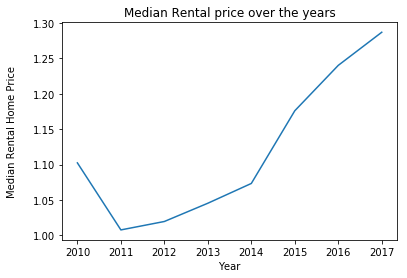

In [5]:
df_city.groupby(df_city['Year'])['MedianRentalPricePerSqft_AllHomes'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

### Show turnover in histogram

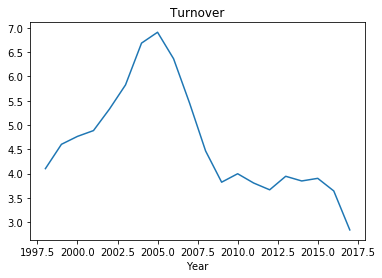

In [6]:
df_city.groupby(df_city['Year'])['Turnover_AllHomes'].mean().plot()
plt.title('Turnover')
plt.show()


## The data seems to suggest that the median selling price per square foot and the median rental price per square foot decrease and rises together. Let's further explore below

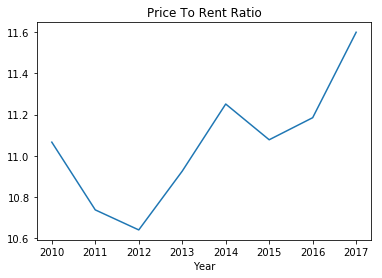

In [7]:
# Normalize. use plt.plot() overlap price to rent ratio plot to median rental price plot

df_city.groupby(df_city['Year'])['PriceToRentRatio_AllHomes'].mean().plot()
plt.title('Price To Rent Ratio')
plt.show()

# Exploring changes in price for different home types

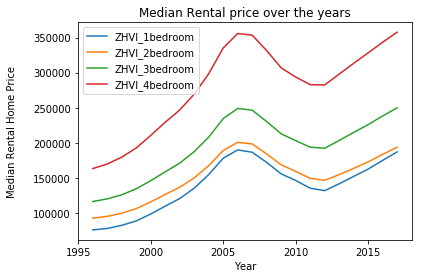

In [8]:
df_city.groupby(df_city['Year'])['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

### The data suggests that all four categories of home rise and fall about the same

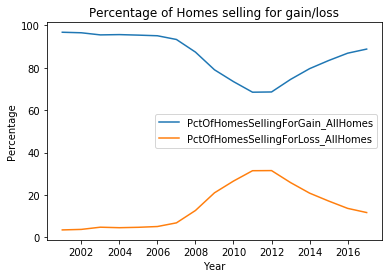

In [9]:
df_city.groupby(df_city['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean().plot()

plt.title('Percentage of Homes selling for gain/loss')
plt.ylabel('Percentage')
plt.show()

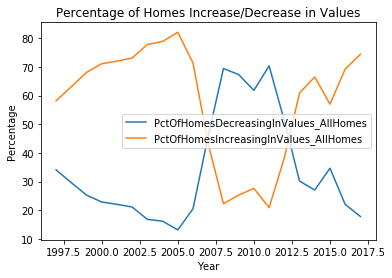

In [10]:
df_city.groupby(df_city['Year'])['PctOfHomesDecreasingInValues_AllHomes','PctOfHomesIncreasingInValues_AllHomes'].mean().plot()

plt.title('Percentage of Homes Increase/Decrease in Values')
plt.ylabel('Percentage')
plt.show()

### Data suggests that all home values start to increase after 2011. As percentage of homes increasing in value starts to rise at 2011. On the other hand, the percentage of homes decreasing in value decreases at 2011. It took around 5 years since the 2008 housing crisis for the housing market to stabilize. 

# Selecting only cities in Los Angeles

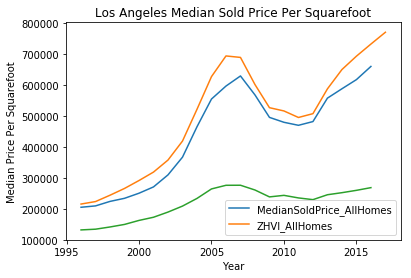

In [11]:
pd.options.mode.chained_assignment = None

df_city_la = df_city[df_city['RegionName'].str.contains('los_angeles')]

df_city_la.groupby(df_city_la['Year'])['MedianSoldPrice_AllHomes','ZHVI_AllHomes',].mean().plot()
df_city.groupby(df_city['Year'])['MedianSoldPrice_AllHomes'].mean().plot()
plt.title('Los Angeles Median Sold Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')
plt.show()

#### Los Angeles Price is extremly high compared to the rest of the the country

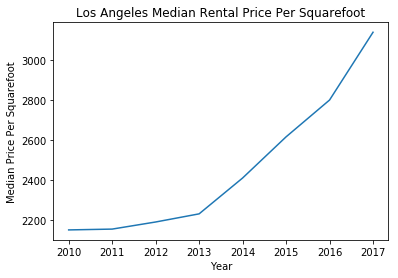

In [12]:
pd.options.mode.chained_assignment = None

df_city_la.groupby(df_city_la['Year'])['MedianRentalPrice_AllHomes'].mean().plot()
plt.title('Los Angeles Median Rental Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')
plt.show()

Text(0,0.5,'Median Price Per Squarefoot')

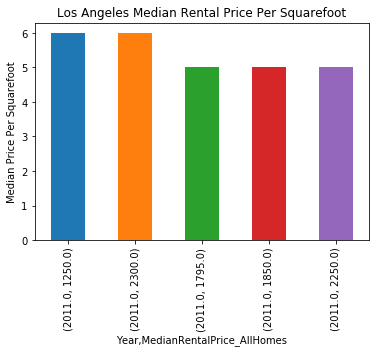

In [13]:
df_city_la_2017 = df_city_la[df_city_la['Year'] > 2010]

df_city_la.groupby(df_city_la_2017['Year'])['MedianRentalPrice_AllHomes'].value_counts().head(5).plot(kind='bar')
plt.title('Los Angeles Median Rental Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')


Questions: Correlation between rental price and sales price. Does increase of rental entice investors to buy?
Questions: What kind of houses are most resilient against economic downturn
(I am assuming that it will be single family house due to lack of family obligation(Hence they can cut down on their other cost. In addition, since their salaries are lower, they are probably less likely to be fired compared to a higher exec with high salary)

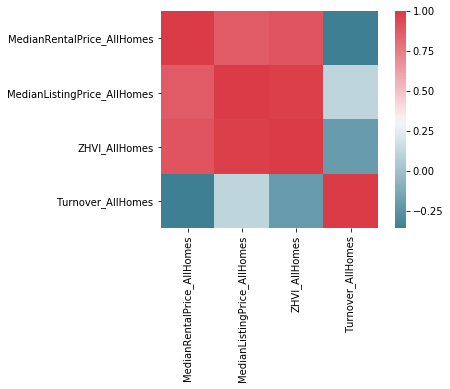

In [14]:

df_city1 = df_city_la[['MedianRentalPrice_AllHomes','MedianListingPrice_AllHomes','ZHVI_AllHomes','Turnover_AllHomes']]

corr = df_city1.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


### Explore: Listing Price and Rental price has low correlation.
### This confirmed that higher the listing price = higher the Zilllow Housing Value Index

# Exploring correlations on the national level

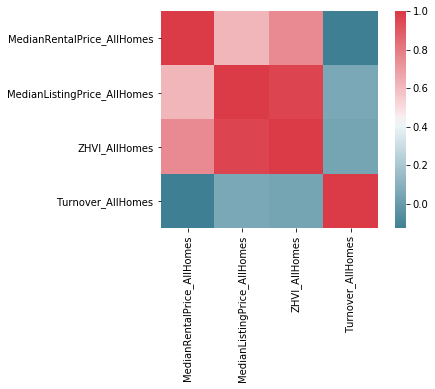

In [53]:

df_city2 = df_city[['MedianRentalPrice_AllHomes','MedianListingPrice_AllHomes','ZHVI_AllHomes','Turnover_AllHomes']]

corr1 = df_city2.corr()
sns.heatmap(corr1,mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


### Correlation between Rental price and listing price seems to be smaller on a national level when compared to Los Angeles 

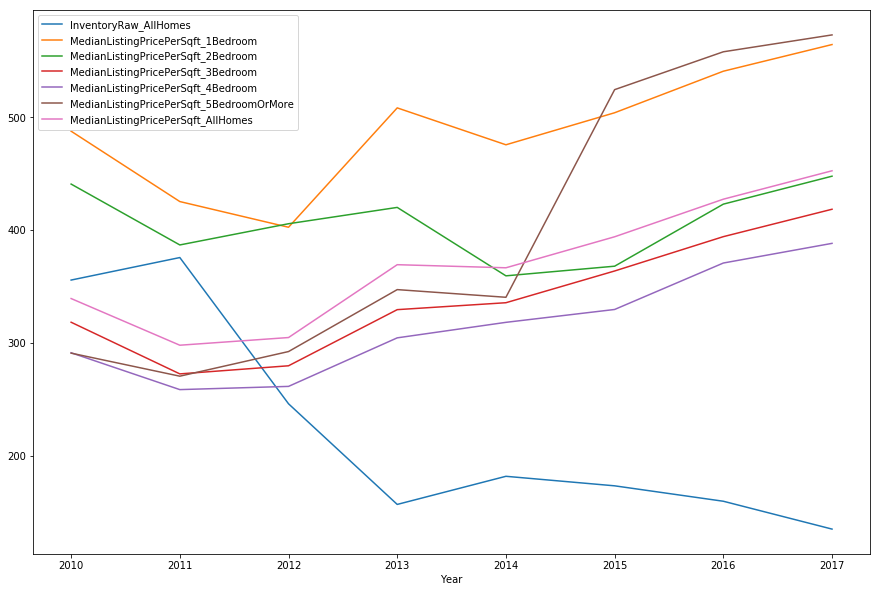

In [54]:


df_city3 = df_city_la.groupby(df_city_la['Year'])['InventoryRaw_AllHomes',
                    'MedianListingPricePerSqft_1Bedroom', 
                    'MedianListingPricePerSqft_2Bedroom',
                    'MedianListingPricePerSqft_3Bedroom',
                    'MedianListingPricePerSqft_4Bedroom',
                    'MedianListingPricePerSqft_5BedroomOrMore',
                    'MedianListingPricePerSqft_AllHomes',].mean().plot(figsize=(15,10))


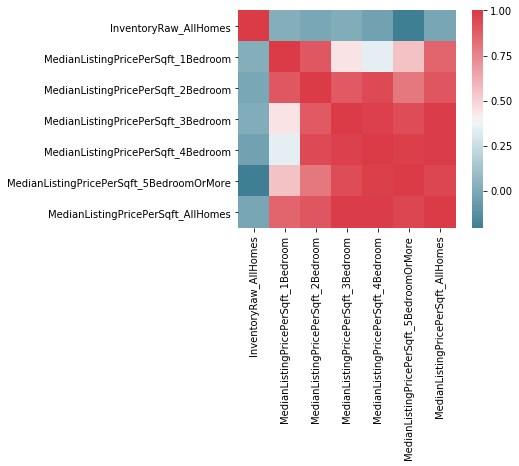

In [58]:
df_city3 = df_city_la[['InventoryRaw_AllHomes',
                    'MedianListingPricePerSqft_1Bedroom', 
                    'MedianListingPricePerSqft_2Bedroom',
                    'MedianListingPricePerSqft_3Bedroom',
                    'MedianListingPricePerSqft_4Bedroom',
                    'MedianListingPricePerSqft_5BedroomOrMore',
                    'MedianListingPricePerSqft_AllHomes']]
corr3 = df_city3.corr()
sns.heatmap(corr3,mask=np.zeros_like(corr3, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


### That's weird. How come Inventory Raw All Homes have no correlation with listing price. Negative Correlations?

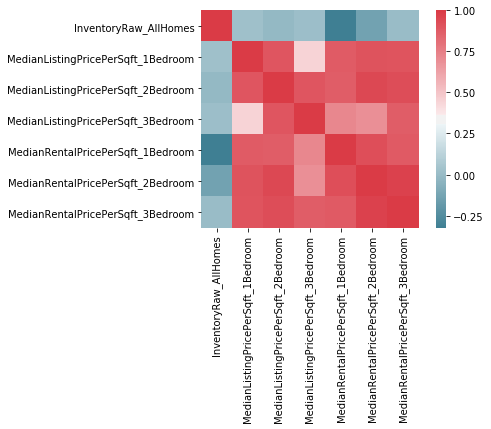

In [59]:
df_city3 = df_city_la[['InventoryRaw_AllHomes',
                    'MedianListingPricePerSqft_1Bedroom', 
                    'MedianListingPricePerSqft_2Bedroom',
                    'MedianListingPricePerSqft_3Bedroom',
                    'MedianRentalPricePerSqft_1Bedroom',
                    'MedianRentalPricePerSqft_2Bedroom',
                    'MedianRentalPricePerSqft_3Bedroom',]]
corr3 = df_city3.corr()
sns.heatmap(corr3,mask=np.zeros_like(corr3, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
